In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
path = "student-mat.csv"
df = pd.read_csv(path, sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
print(df['school'].unique())

['GP' 'MS']


### Binary data (From binary to numerical)

In [4]:
df.school = df.school.map({'GP':0, 'MS':1})
df.sex = df.sex.map({'F':0, 'M':1})
df.address = df.address.map({'U':0, 'R':1})
df.famsize = df.famsize.map({'LE3':0, 'GT3':1})
df.Pstatus = df.Pstatus.map({'T':0, 'A':1})
df.Mjob = pd.factorize(df.Mjob)[0]
df.Fjob	 = pd.factorize(df.Fjob	)[0]
df.reason	 = pd.factorize(df.reason	)[0]
df.guardian	 = pd.factorize(df.guardian	)[0]
df.schoolsup = df.schoolsup.map({'yes':0, 'no':1})
df.famsup = df.famsup.map({'yes':0, 'no':1})
df.paid = df.paid.map({'yes':0, 'no':1})
df.activities = df.activities.map({'yes':0, 'no':1})
df.nursery = df.nursery.map({'yes':0, 'no':1})
df.higher = df.higher.map({'yes':0, 'no':1})
df.internet = df.internet.map({'yes':0, 'no':1})
df.romantic = df.romantic.map({'yes':0, 'no':1})

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
# Define the function to categorize G2 values
def categorize_g2(x):
    if 0 <= x <= 4:
        return 'E'
    elif 5 <= x <= 8:
        return 'D'
    elif 9 <= x <= 12:
        return 'C'
    elif 13 <= x <= 16:
        return 'B'
    elif 17 <= x <= 20:
        return 'A'
    else:
        return None  # Handle cases outside the expected range

# Apply the function using map
df['G2T'] = df['G2'].map(categorize_g2)

In [ ]:
print(df['G2T'].unique())

['D' 'B' 'C' 'A' 'E']


In [6]:
df.G2T	 = pd.factorize(df.G2T)[0]

In [ ]:
df.G2T

0      0
1      0
2      0
3      1
4      2
      ..
390    2
391    1
392    0
393    2
394    2
Name: G2T, Length: 395, dtype: int64


Regression tree

In [7]:
X = df.drop(['G1', 'G2T'], axis = 1)
y = df.G1

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [8]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 316 entries, 23 to 37
Series name: G1
Non-Null Count  Dtype
--------------  -----
316 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


####Start from here, there variables name are not fix yet

In [9]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [10]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.1319913273860644
Mean Squared Error: 2.0934208109510415
Root Mean Squared Error: 1.4468658579671585
R Squared Score is: 0.7872489939562701


G2 0.830206757412732
G3 0.08486839462342115
age 0.020299724957557157
paid 0.009153550605938665
absences 0.008098789613804957
studytime 0.007611489174513054
reason 0.0066013123411860644
schoolsup 0.005062457774722271
activities 0.004433301211817906
Walc 0.004011082048787788
internet 0.003925860519056675
failures 0.003920296710802603
goout 0.002773137333613258
Dalc 0.0023059147960955147
Medu 0.0019161938247775944
nursery 0.001806771387522474
famsup 0.0014870546399361694
freetime 0.0008431599808437833
Fedu 0.0006747510428708984
traveltime 0.0
sex 0.0
school 0.0
romantic 0.0
higher 0.0
health 0.0
guardian 0.0
famsize 0.0
famrel 0.0
address 0.0
Pstatus 0.0
Mjob 0.0
Fjob 0.0


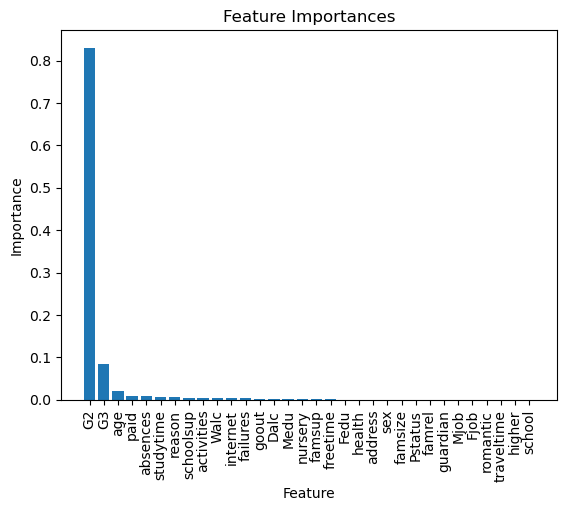

In [12]:
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
sorted_indices = np.argsort(dt.feature_importances_)[::-1]

# Create a bar plot
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), dt.feature_importances_[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Classfication

<Axes: >

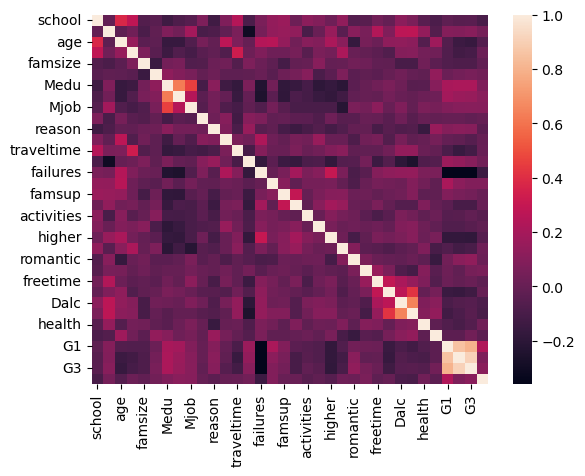

In [13]:
# Correlation matrix
df.corr()
sns.heatmap(df.corr())

In [14]:
X = df.drop(['G2T','G2'], axis = 1)
y = df.G2T

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [15]:
classification_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
classification_tree.fit(X_train, y_train)
pred2 = classification_tree.predict(X_test)

In [16]:
pred2

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 1, 3, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 4, 4, 2, 3, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.759493670886076

In [18]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n{classification_report(y_test, pred2)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.80      0.80      0.80        15
           2       0.84      0.80      0.82        45
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         0

    accuracy                           0.76        79
   macro avg       0.56      0.55      0.55        79
weighted avg       0.78      0.76      0.77        79



C:\Users\Radzmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Radzmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Radzmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Abaikan

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<Axes: >

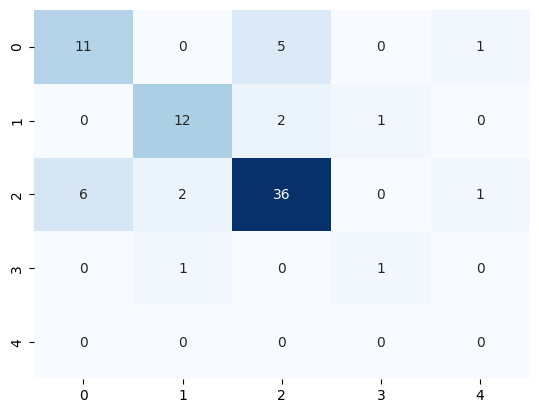

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, pred2)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [ ]:
# Regression Score of the model
print('Score For Train Data : {}'.format(classification_tree.score(X_train,y_train)))
print('Score For Test Data : {}'.format(classification_tree.score(X_test,y_test)))
print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')



Score For Train Data : 1.0
Score For Test Data : 0.759493670886076
The mean absolute error: 0.45569620253164556
The mean squared error: 0.9620253164556962
The root mean squared error: 0.9808288925473679




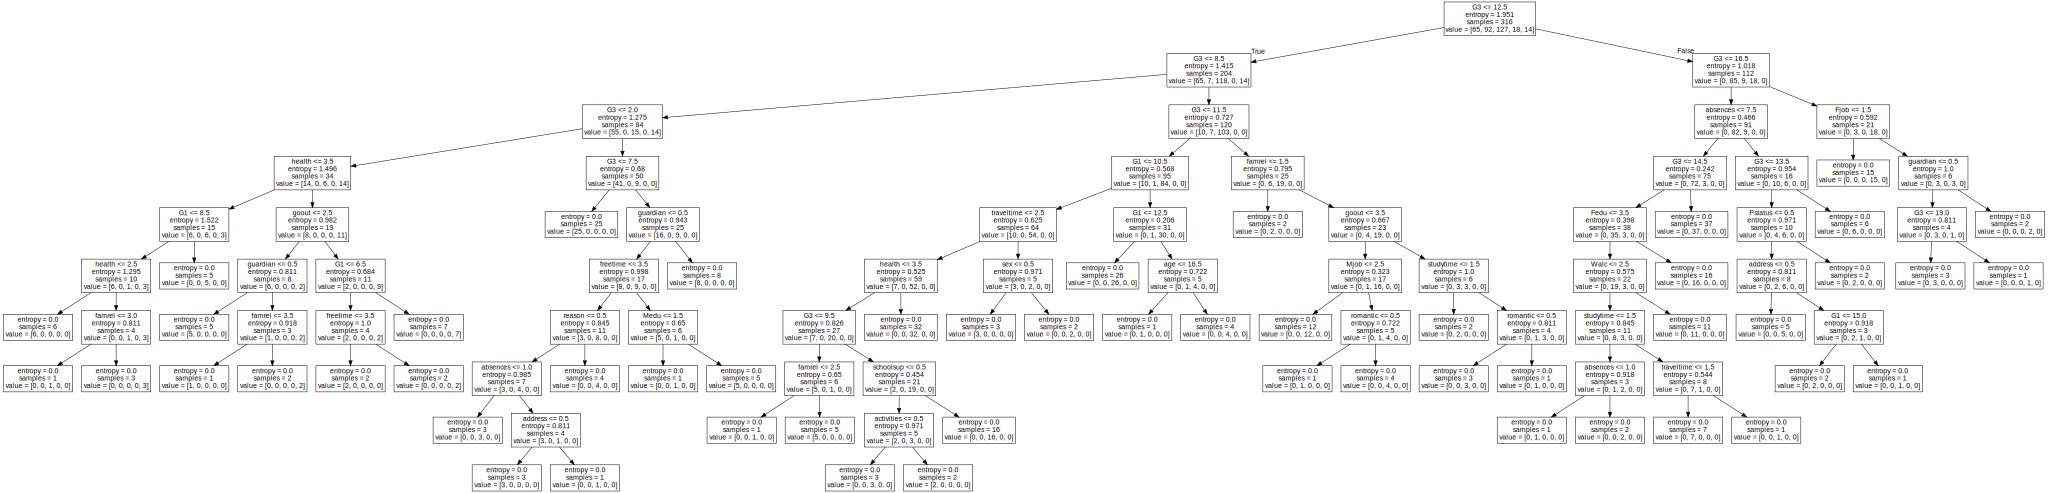

In [ ]:
export_graphviz(classification_tree,
                out_file = "carseat_tree.dot", ##can rename other name
                feature_names = X_train.columns)

with open("carseat_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Random Forests

In [26]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and fit the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
# Make predictions
pred_rf = random_forest.predict(X_test)

In [28]:
# Classification Score of the model
print('Score For Train Data : {}'.format(random_forest.score(X_train, y_train)))
print('Score For Test Data : {}'.format(random_forest.score(X_test, y_test)))

Score For Train Data : 1.0
Score For Test Data : 0.8481012658227848


In [29]:
# Classification error metrics
print('Accuracy:', metrics.accuracy_score(y_test, pred_rf))
print('Precision:', metrics.precision_score(y_test, pred_rf, average='weighted'))
print('Recall:', metrics.recall_score(y_test, pred_rf, average='weighted'))
print('F1 Score:', metrics.f1_score(y_test, pred_rf, average='weighted'))

Accuracy: 0.8481012658227848
Precision: 0.8254210167773008
Recall: 0.8481012658227848
F1 Score: 0.8352366538249861


C:\Users\Radzmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Feature importance
feature_importances = random_forest.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [33]:
# Display the ranking of features
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
       Feature  Importance
31          G3    0.288697
30          G1    0.169636
29    absences    0.045624
2          age    0.031632
6         Medu    0.027136
25       goout    0.026090
13   studytime    0.025928
28      health    0.025217
27        Walc    0.025190
24    freetime    0.024964
8         Mjob    0.024767
23      famrel    0.024233
10      reason    0.024229
7         Fedu    0.024137
9         Fjob    0.023000
14    failures    0.022608
12  traveltime    0.019181
11    guardian    0.014463
26        Dalc    0.014228
18  activities    0.012407
4      famsize    0.011977
22    romantic    0.011680
17        paid    0.011210
16      famsup    0.010168
3      address    0.009170
15   schoolsup    0.009075
19     nursery    0.008935
1          sex    0.008650
21    internet    0.008346
5      Pstatus    0.007635
20      higher    0.005119
0       school    0.004667


In [34]:
# If you're using a Jupyter notebook, you can use display() from IPython.display
from IPython.display import display
display(importance_df)

,Feature,Importance
31,G3,0.288697
30,G1,0.169636
29,absences,0.045624
2,age,0.031632
6,Medu,0.027136
25,goout,0.026090
13,studytime,0.025928
28,health,0.025217
27,Walc,0.025190
24,freetime,0.024964


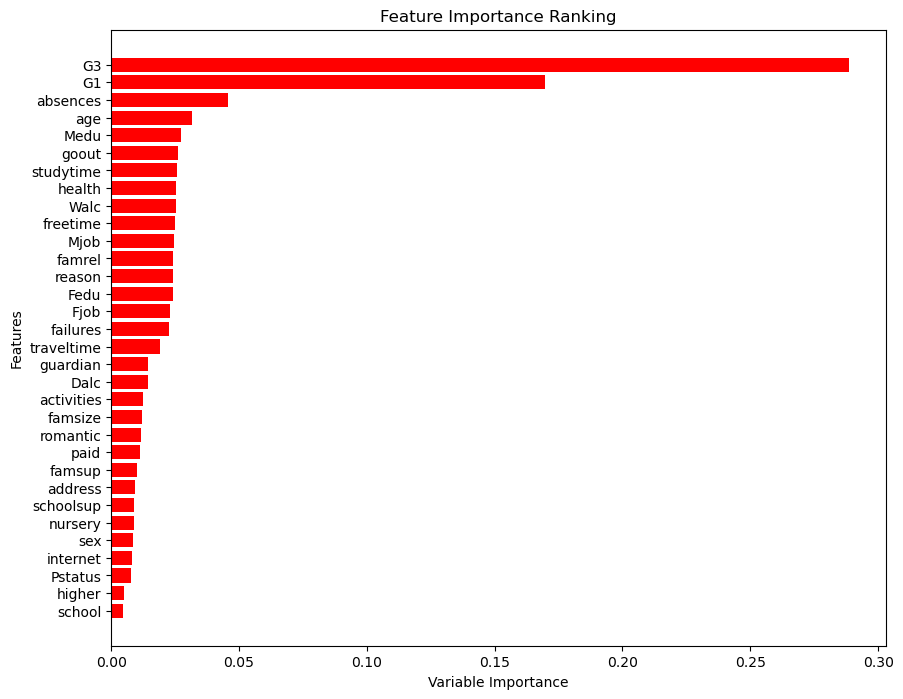

In [36]:
# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [19]:
bagged = RandomForestRegressor(max_features = 10, random_state = 1)
bagged.fit(X_train, y_train)

RandomForestRegressor(max_features=10, random_state=1)

0.49719367088607586

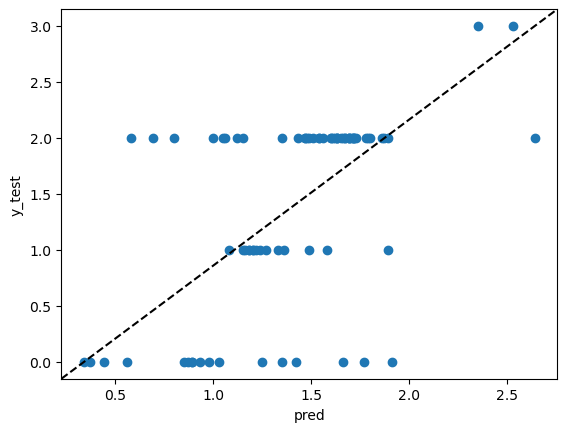

In [20]:
pred = bagged.predict(X_test)

plt.scatter(pred,
            y_test,
            label = 'medv')

plt.plot([0, 1],
         [0, 1],
         '--k',
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

In [21]:
# Random forests: using 6 features
random_forest_boston = RandomForestRegressor(max_features = 6, random_state = 1)

random_forest_boston.fit(X_train, y_train)

pred = random_forest_boston.predict(X_train)
mean_squared_error(y_train, pred)

0.12134936708860758

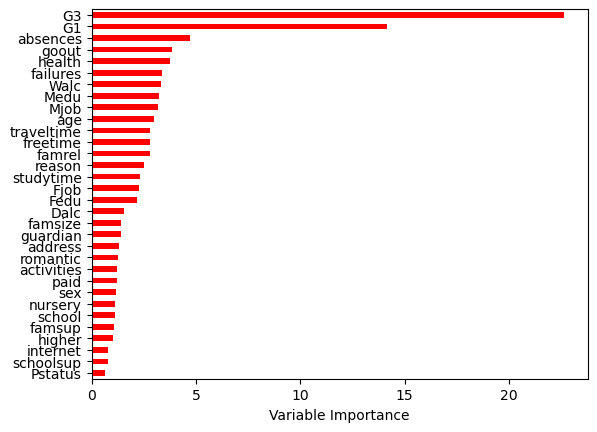

In [22]:
Importance = pd.DataFrame({'Importance':random_forest_boston.feature_importances_*100},
                          index = X.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

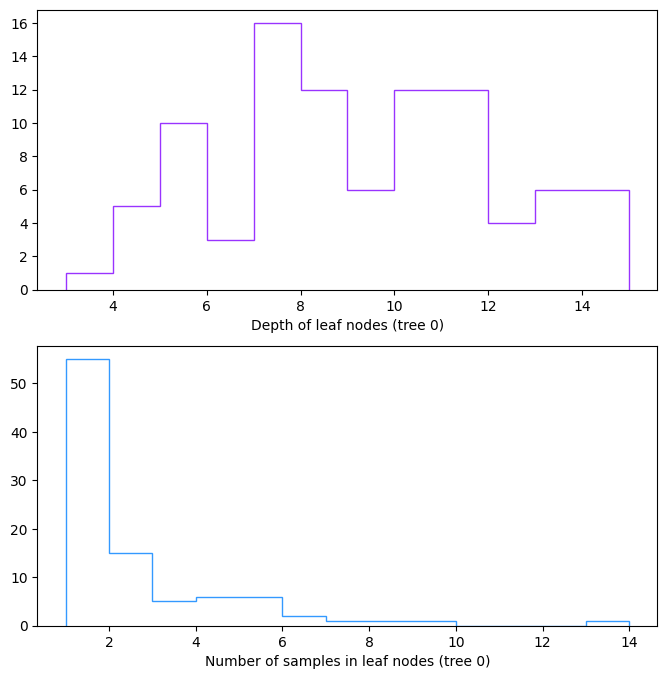

In [ ]:
from sklearn.tree import _tree

def leaf_depths(tree, node_id = 0):

     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal,
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:

         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:

         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1

         depths = np.append(left_depths, right_depths)

     return depths

def leaf_samples(tree, node_id = 0):

     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:

         samples = np.array([tree.n_node_samples[node_id]])

     else:

         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color='#9933ff',
              bins=range(min(depths), max(depths)+1))

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)

     plt.subplot(212)

     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='#3399ff',
              bins=range(min(samples), max(samples)+1))

     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)

     plt.show()

draw_tree(random_forest_boston)

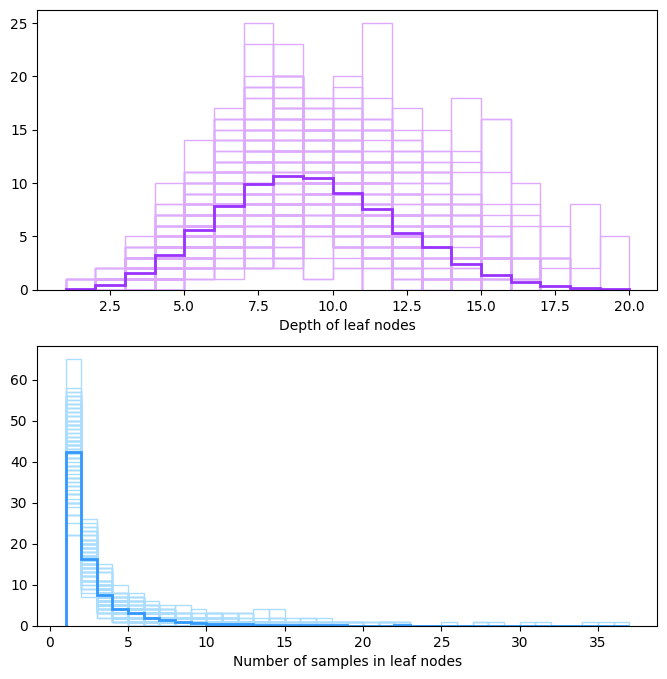

In [ ]:
def draw_ensemble(ensemble):

     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff',
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff',
              bins=range(min(depths_all), max(depths_all)+1),
              weights=np.ones(len(depths_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")

     samples_all = np.array([], dtype=int)

     plt.subplot(212)

     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff',
                  bins=range(min(samples), max(samples)+1))

     plt.hist(samples_all, histtype='step', color='#3399ff',
              bins=range(min(samples_all), max(samples_all)+1),
              weights=np.ones(len(samples_all))/len(ensemble.estimators_),
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")

     plt.show()

draw_ensemble(random_forest_boston)

##Perplxity

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable for G3 prediction
features = df.drop(columns=['G1', 'G2', 'G3'])
target = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=1)

# Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Build the Random Forest model
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
30         G2T    0.756715
29    absences    0.069137
2          age    0.023036
23      famrel    0.012238
11    guardian    0.011983
28      health    0.011488
25       goout    0.011355
8         Mjob    0.010915
9         Fjob    0.010015
13   studytime    0.009544
27        Walc    0.008458
24    freetime    0.006991
6         Medu    0.006417
7         Fedu    0.006322
12  traveltime    0.005474
10      reason    0.004906
14    failures    0.004051
18  activities    0.004008
26        Dalc    0.003811
19     nursery    0.002963
16      famsup    0.002629
22    romantic    0.002583
0       school    0.002282
1          sex    0.002175
17        paid    0.002063
3      address    0.002063
15   schoolsup    0.001819
4      famsize    0.001704
21    internet    0.001370
5      Pstatus    0.000891
20      higher    0.000595


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = df

# Define features and target variable
features = data.drop(columns=['G1', 'G2', 'G3'])
target = data['G1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=1)

# Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Build the regression tree
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.848101265822785


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Transform G2 into G2T
def transform_G2(g2):
    if g2 <= 4:
        return 'E'
    elif g2 <= 8:
        return 'D'
    elif g2 <= 12:
        return 'C'
    elif g2 <= 16:
        return 'B'
    else:
        return 'A'

data['G2T'] = data['G2'].apply(transform_G2)

# Define features and target variable
features = data.drop(columns=['G1', 'G2', 'G3', 'G2T'])
target = data['G2T']

# Encode the target variable
le = LabelEncoder()
target = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=1)

# Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Build the classification tree
classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy}')



Accuracy: 0.3924050632911392


In [ ]:
from sklearn.ensemble import RandomForestRegressor
data.G2T	 = pd.factorize(df.G2T)[0]
# Define features and target variable for G3 prediction
features = data.drop(columns=['G1', 'G2', 'G3','G2T'])
target = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=1)

# Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Build the Random Forest model
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
29    absences    0.178062
14    failures    0.119503
25       goout    0.046989
8         Mjob    0.043866
2          age    0.043686
28      health    0.041460
24    freetime    0.038766
10      reason    0.037005
6         Medu    0.036523
9         Fjob    0.035921
13   studytime    0.034554
12  traveltime    0.029337
7         Fedu    0.029176
27        Walc    0.028639
11    guardian    0.028453
1          sex    0.027904
23      famrel    0.025790
15   schoolsup    0.025495
20      higher    0.020378
22    romantic    0.017126
18  activities    0.015723
4      famsize    0.014367
16      famsup    0.012789
19     nursery    0.012375
5      Pstatus    0.012007
26        Dalc    0.011825
17        paid    0.009561
21    internet    0.008207
3      address    0.007873
0       school    0.006642
